In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Covid19_confirmedDataset.csv')
data.shape

(266, 104)

In [3]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
# Removing columns that are not required
data.drop(['Lat', 'Long'], axis=1, inplace=True)
data.shape

(266, 102)

In [5]:
data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
# Creating a dataframe that is indexed with respect to country name
coronaDataAggregated = data.groupby('Country/Region').sum()
coronaDataAggregated.drop(['Province/State'], axis=1, inplace=True)

In [7]:
coronaDataAggregated.shape

(187, 100)

In [8]:
coronaDataAggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


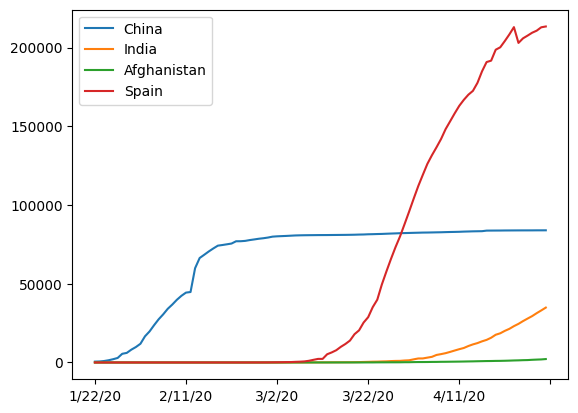

In [9]:
coronaDataAggregated.loc['China'].plot()
coronaDataAggregated.loc['India'].plot()
coronaDataAggregated.loc['Afghanistan'].plot()
coronaDataAggregated.loc['Spain'].plot()
plt.legend()

#### Plot demonstrating number of cases per day

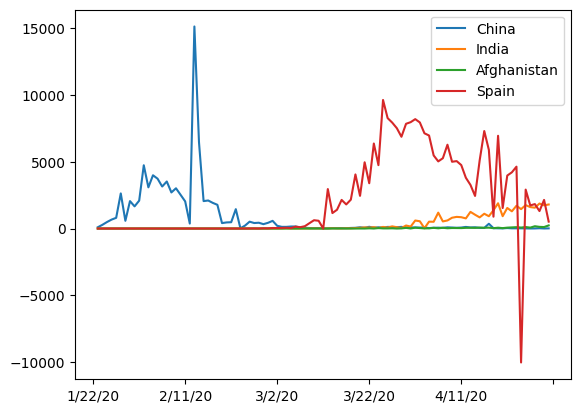

In [10]:
coronaDataAggregated.loc['China'].diff().plot()
coronaDataAggregated.loc['India'].diff().plot()
coronaDataAggregated.loc['Afghanistan'].diff().plot()
coronaDataAggregated.loc['Spain'].diff().plot()
plt.legend()

In [11]:
print("Maximum Infection rate for China:",coronaDataAggregated.loc['China'].diff().max())
print("Maximum Infection rate for India:",coronaDataAggregated.loc['India'].diff().max())
print("Maximum Infection rate for Afghanistan:",coronaDataAggregated.loc['Afghanistan'].diff().max())
print("Maximum Infection rate for Spain:",coronaDataAggregated.loc['Spain'].diff().max())

Maximum Infection rate for China: 15136.0
Maximum Infection rate for India: 1893.0
Maximum Infection rate for Afghanistan: 232.0
Maximum Infection rate for Spain: 9630.0


In [12]:
countries = list(coronaDataAggregated.index)
maxInfectionRates = []

for country in countries:
    maxInfectionRates.append(coronaDataAggregated.loc[country].diff().max())

coronaDataAggregated['Maximum Infection Rates'] = maxInfectionRates

In [13]:
coronaDataAggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Maximum Infection Rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [14]:
# creating a dataframe only consisiting of the maximum infection rates column
coronaData = pd.DataFrame(coronaDataAggregated['Maximum Infection Rates'])

In [15]:
coronaData

,Maximum Infection Rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [16]:
happinessData = pd.read_csv('worldHappinessReport_2019.csv')

In [17]:
happinessData.shape

(156, 9)

In [18]:
happinessData.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
# Removing columns that are not required from happiness data
uselessCols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
happinessData.drop(uselessCols, axis=1, inplace=True)
happinessData.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [20]:
# Setting the index of happiness report as the names of the countries
happinessData.set_index('Country or region', inplace=True)
happinessData.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [21]:
print(coronaData.shape, happinessData.shape)

(187, 1) (156, 4)


#### Merging the happiness report with the covid data

In [22]:
mergedData = coronaData.join(happinessData, how='inner')

In [23]:
mergedData.head()

,Maximum Infection Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [24]:
mergedData.corr()

,Maximum Infection Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum Infection Rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


#### GDP per capita vs Maximum Infection Rates

<Axes: xlabel='GDP per capita', ylabel='Maximum Infection Rates'>

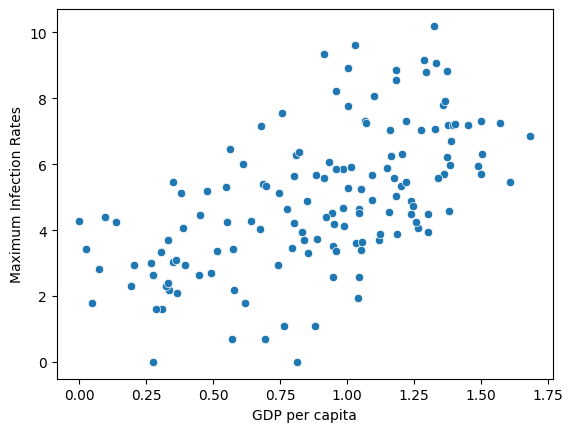

In [25]:
x = mergedData['GDP per capita']
y = mergedData['Maximum Infection Rates']
sns.scatterplot(x=x, y=np.log(y)) #logscaling

<Axes: xlabel='GDP per capita', ylabel='Maximum Infection Rates'>

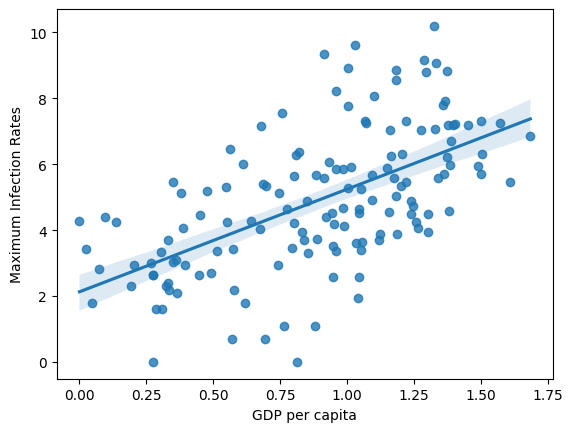

In [26]:
sns.regplot(x=x, y=np.log(y))

#### Social support vs Maximum Infection Rates

<Axes: xlabel='Social support', ylabel='Maximum Infection Rates'>

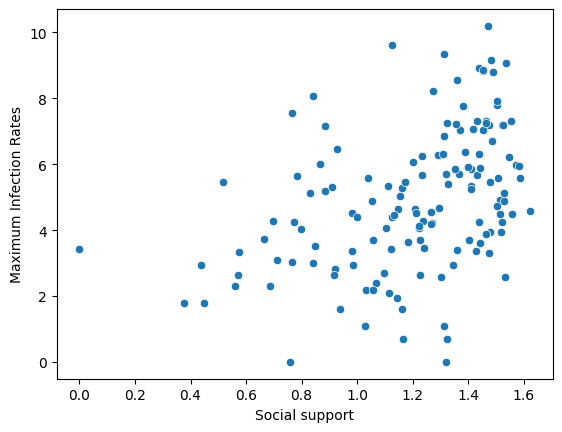

In [27]:
x = mergedData['Social support']
y = mergedData['Maximum Infection Rates']
sns.scatterplot(x=x, y=np.log(y)) #logscaling

<Axes: xlabel='Social support', ylabel='Maximum Infection Rates'>

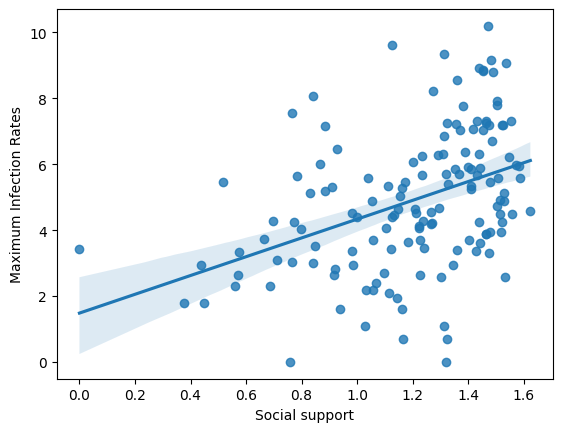

In [28]:
sns.regplot(x=x, y=np.log(y))

#### Healthy life expectancy vs Maximum Infection Rates

<Axes: xlabel='Healthy life expectancy', ylabel='Maximum Infection Rates'>

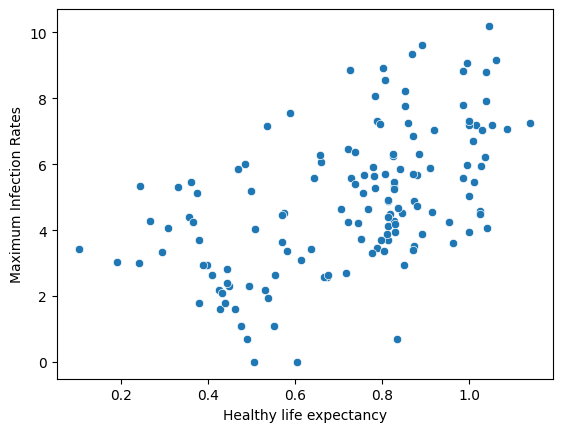

In [29]:
x = mergedData['Healthy life expectancy']
y = mergedData['Maximum Infection Rates']
sns.scatterplot(x=x, y=np.log(y)) #logscaling

<Axes: xlabel='Healthy life expectancy', ylabel='Maximum Infection Rates'>

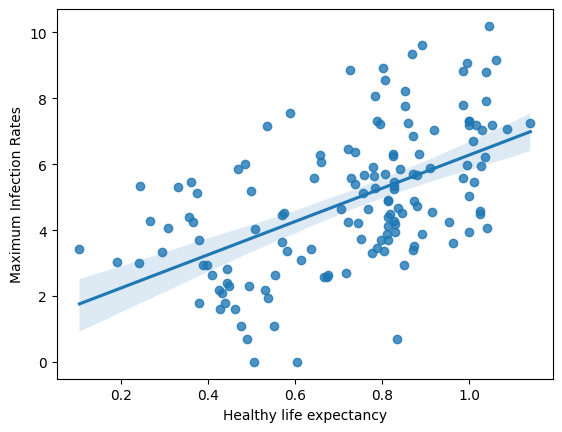

In [30]:
sns.regplot(x=x, y=np.log(y))

#### Freedom to make life choices vs Maximum Infection Rates

<Axes: xlabel='Freedom to make life choices', ylabel='Maximum Infection Rates'>

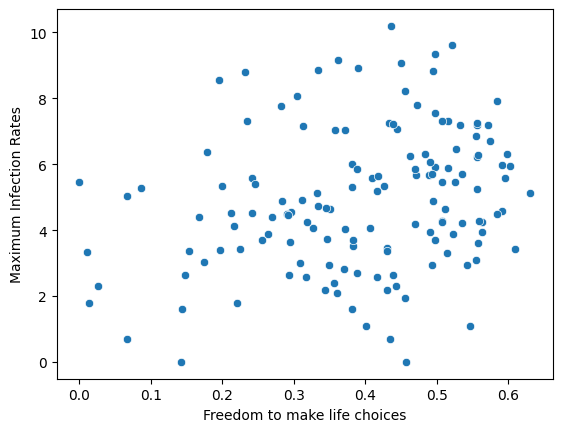

In [31]:
x = mergedData['Freedom to make life choices']
y = mergedData['Maximum Infection Rates']
sns.scatterplot(x=x, y=np.log(y)) #logscaling

<Axes: xlabel='Freedom to make life choices', ylabel='Maximum Infection Rates'>

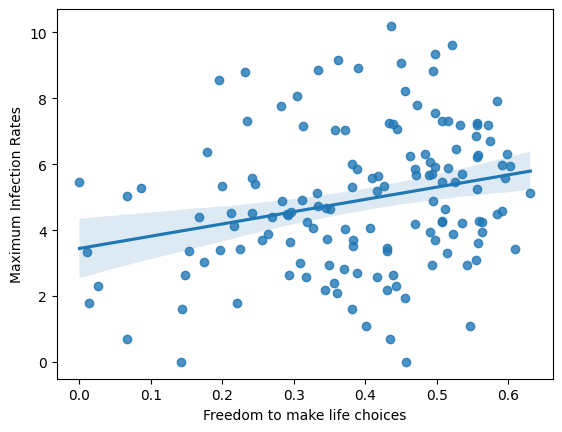

In [32]:
sns.regplot(x=x, y=np.log(y))

## Conclusion
- Maximum Infection Rate increases with increase in GDP per capita, Social support, Healthy life expectancy & Freedom to make life choices